In [14]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [15]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(v, k) for (k, v) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[2]])
decoded_newswire

'? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1987 per share amounts are calculated after preferred stock dividends loss continuing operations for the qtr 1986 includes gains of sale of investments in ? corp of 14 mln dlrs and associated companies of 4 189 000 less writedowns of investments in national ? inc of 11 8 mln and ? corp of 15 6 mln reuter 3'

In [24]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [25]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [26]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [27]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
from keras.utils.np_utils import to_categorical

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [33]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 74us/step - loss: 2.5415 - acc: 0.5228 - val_loss: 1.6846 - val_acc: 0.6420
Epoch 2/20
7982/7982 [==============================] - 1s 72us/step - loss: 1.3821 - acc: 0.7082 - val_loss: 1.2806 - val_acc: 0.7170
Epoch 3/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.0183 - acc: 0.7769 - val_loss: 1.1110 - val_acc: 0.7680
Epoch 4/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.7953 - acc: 0.8299 - val_loss: 1.0184 - val_acc: 0.7830
Epoch 5/20
7982/7982 [==============================] - 1s 75us/step - loss: 0.6362 - acc: 0.8649 - val_loss: 0.9509 - val_acc: 0.7990
Epoch 6/20
7982/7982 [==============================] - 1s 75us/step - loss: 0.5065 - acc: 0.8951 - val_loss: 0.9285 - val_acc: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 73us/step - loss: 0.4091 - acc: 0.9131 - val_loss: 0.8893 - val_acc: 0.8170
Epoch 8

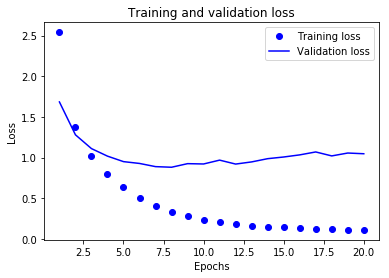

In [34]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

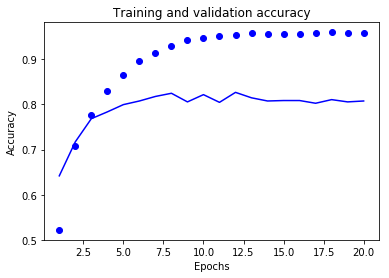

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    partial_x_train,
    partial_y_train,
    epochs=8,
    batch_size=512,
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 105us/step - loss: 2.8535 - acc: 0.4022 - val_loss: 1.9506 - val_acc: 0.6340
Epoch 2/8
7982/7982 [==============================] - 1s 73us/step - loss: 1.5744 - acc: 0.6898 - val_loss: 1.3817 - val_acc: 0.7110
Epoch 3/8
7982/7982 [==============================] - 1s 72us/step - loss: 1.1286 - acc: 0.7676 - val_loss: 1.1845 - val_acc: 0.7390
Epoch 4/8
7982/7982 [==============================] - 1s 73us/step - loss: 0.8774 - acc: 0.8226 - val_loss: 1.0474 - val_acc: 0.7810
Epoch 5/8
7982/7982 [==============================] - 1s 72us/step - loss: 0.6982 - acc: 0.8559 - val_loss: 0.9800 - val_acc: 0.8030
Epoch 6/8
7982/7982 [==============================] - 1s 72us/step - loss: 0.5531 - acc: 0.8899 - val_loss: 0.9446 - val_acc: 0.7990
Epoch 7/8
7982/7982 [==============================] - 1s 72us/step - loss: 0.4479 - acc: 0.9100 - val_loss: 0.9432 - val_acc: 0.8090
Epoch 8/8
224

In [38]:
results

[0.9745568277999321, 0.7876224399462196]

In [39]:
predictions = model.predict(x_test)

In [43]:
np.argmax(predictions[0])

3

In [45]:
#中間層の大きさ実験

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 138us/step - loss: 2.8698 - acc: 0.2400 - val_loss: 2.2532 - val_acc: 0.2740
Epoch 2/20
7982/7982 [==============================] - 1s 103us/step - loss: 1.9572 - acc: 0.5645 - val_loss: 1.7833 - val_acc: 0.6310
Epoch 3/20
7982/7982 [==============================] - 1s 98us/step - loss: 1.6352 - acc: 0.6429 - val_loss: 1.6446 - val_acc: 0.6280
Epoch 4/20
7982/7982 [==============================] - 1s 100us/step - loss: 1.4963 - acc: 0.6526 - val_loss: 1.6089 - val_acc: 0.6280
Epoch 5/20
7982/7982 [==============================] - 1s 98us/step - loss: 1.4124 - acc: 0.6587 - val_loss: 1.5896 - val_acc: 0.6370
Epoch 6/20
7982/7982 [==============================] - 1s 98us/step - loss: 1.3491 - acc: 0.6642 - val_loss: 1.5768 - val_acc: 0.6440
Epoch 7/20
7982/7982 [==============================] - 1s 99us/step - loss: 1.2946 - acc: 0.6645 - val_loss: 1.5935 - val_acc: 0.6370
Epoc